<a href="https://colab.research.google.com/github/minalee98/QTM350FinalProject/blob/main/QTM350FinalProjectAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Final Analysis

Hello, Everyone. This notebook will be walking you step-by-step through our final analysis and will end with a detailed description of our results. As a result of following through this notebook, you will learn how to import your data into the environment, create summary statistics, fit a linear regression model to calculate statistical correlation, and finally, visualize your results in a clear and concise manner. 

## Importing the Data

Before we can start the analysis, we need to import the data into our environment. 

In [ ]:
# Import Pandas package for later use
import pandas as pd

In [ ]:
# Import the data
from google.colab import files
uploaded=files.upload()

import io
df=pd.read_excel(io.BytesIO(uploaded['FinalProjData.xlsx']))

Saving FinalProjData.xlsx to FinalProjData (2).xlsx


In [ ]:
# Check if the data is there
df

,Song,Genre,Speed,Accuracy
0,rocket man,rock,0.5x,17.02
1,rocket man,rock,1x,27.41
2,rocket man,rock,2x,22.36
3,APB,rock,0.5x,10.55
4,APB,rock,1x,26.22
...,...,...,...,...
142,Breakaway,pop,1x,28.29
143,Breakaway,pop,2x,33.61
144,happier,pop,0.5x,21.14
145,happier,pop,1x,53.43


Now that we know that our data has been successfully loaded into the environment, we can start our analysis.

## Summary statistics

We want to get a better understanding of our data. To do so, we will find the average accuracy for the different Genres and for the different speeds.

In [ ]:
# Basic summary statistics
df.describe()

,Accuracy
count,147.000000
mean,36.429116
std,21.092114
min,0.000000
25%,20.015000
50%,35.320000
75%,55.125000
max,82.340000


Text(0.5, 1.0, 'Distribution of Accuracy Scores')

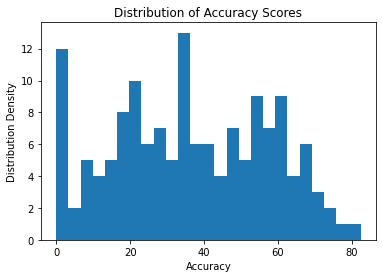

In [ ]:
# Importing matplotlib package
import matplotlib.pyplot as plt

# Visualizing the distribution of Accuracy 
plt.hist(df['Accuracy'], bins = 25)
plt.xlabel('Accuracy')
plt.ylabel('Distribution Density')
plt.title('Distribution of Accuracy Scores')


In [ ]:
# Use pandas to find average accuracy by genre 
df_genre=df.groupby(['Genre'], as_index=False).mean()
df_genre

,Genre,Accuracy
0,pop,35.006667
1,rap,46.430000
2,rock,29.440000


Text(0.5, 1.0, 'Genre vs. Average Accuracy')

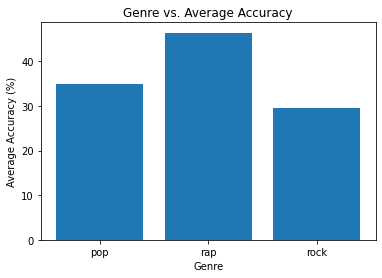

In [ ]:
# Visualizing the correlation between genre and accuracy
plt.bar(df_genre['Genre'], df_genre['Accuracy'])
plt.xlabel('Genre')
plt.ylabel('Average Accuracy (%)')
plt.title('Genre vs. Average Accuracy')

In [ ]:
# Use pandas to find average accuracy by speed
df_speed=df.groupby(['Speed'], as_index=False).mean()
df_speed

,Speed,Accuracy
0,0.5x,29.927551
1,1x,47.808980
2,2x,31.550816


Text(0.5, 1.0, 'Speed vs. Average Accuracy')

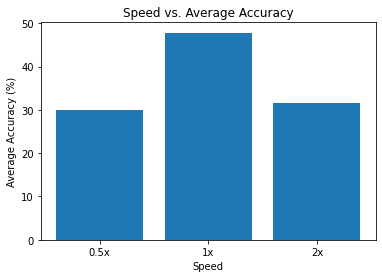

In [ ]:
# Visualizing the correlation between speed and accuracy
plt.bar(df_speed['Speed'], df_speed['Accuracy'])
plt.xlabel('Speed')
plt.ylabel('Average Accuracy (%)')
plt.title('Speed vs. Average Accuracy')

In [ ]:
# Use pandas to find average accuracy by genre and speed
df_both=df.groupby(['Speed', 'Genre'], as_index=False).mean()
df_both

,Speed,Genre,Accuracy
0,0.5x,pop,27.325806
1,0.5x,rap,42.954000
2,0.5x,rock,23.726250
3,1x,pop,45.767097
4,1x,rap,59.140000
5,1x,rock,41.557500
6,2x,pop,31.927097
7,2x,rap,37.196000
8,2x,rock,23.036250


As shown from the tables above, the different genres and speeds definitely make a difference in how accurate Amazon Transcribe's transcription is. In order to know the magnitude of the effect, however, we will need to create a model a fit a linear regression on our data.

## The Linear Regression

Our model is very simple. We want to know just how much genre and speed effects the accuracy of the transcription. Therefore, our model will look like this:

$Accuracy_{estimate} = B_0 + B_1*Genre + B_2*Speed + residual$

In [ ]:
# Import the package linregress from scipy.stats
import statsmodels.formula.api as smf

# Run the model
results = smf.ols('Accuracy ~ Speed+Genre', data=df).fit()
results.params

Intercept        28.505102
Speed[T.1x]      17.881429
Speed[T.2x]       1.623265
Genre[T.rap]     11.423333
Genre[T.rock]    -5.566667
dtype: float64

In [ ]:
results.tvalues

Intercept        9.636628
Speed[T.1x]      4.669923
Speed[T.2x]      0.423933
Genre[T.rap]     2.870562
Genre[T.rock]   -1.282844
dtype: float64

## The results

Our model has returned some interesting results. As seen above, songs displayed at the original speed are roughly 17.88% more accurate than those at half  speed (0.5x) and 16% more accurate than those at double speed (2.0x).

We initally hypothesized that transcribe performance would be better at the half the original speed. This is because most songs have quite speedy tempo, which makes the system hard to pick up the lyrics. Hence, we believed that the slowed down audio would faciliate the transcription as the service might be able to pick up more lyrics than either from original or faster speed. 

It is important to note that only the coefficient on the original speed is statistically significant (1% level). 

The genres also produced very interesting results. We hypothesized that rock and rap would both be very hard to transcribe because of background sounds and speed of tempo, respectively. However, to our surprise, rap had the best average accuracy and was generally 11.42% more accurate than pop and 16.98% more accurate than rock. It is understandable that rock has the worst accuracy out of the three genres. We believe this has been the case for the following reasons:

1. Rap songs (at least most of the rap songs we used) were full of lyrics unlike other songs. This means that lyrics were emphasized rather than the melody or other noise.

2. Songs that have lot of melody: when the singer sings words in rhythmic tone or don't pronounce the words precisely & distinctly, the lyrics tend not to be picked up well.

1. Rock songs tend to have a lot of background music and that could make it hard for the Transcribe service to properly listen to the audio

2. Rock artists are often yelling or speaking in a unorthodox manner that can make them hard to understand

From these two coefficients, only the one on the genre Rap is statistically significant and it is also at the 1% level. 

## Conclusion

To conclude, we were definitely a little bit off regarding what we hypothesized versus the actual results. However, we believe there are many factors that resulted in these results. Often the AWS Transcribe service was not able to formulate text for the entire song. For one reason or another (there was no obvious pattern for why this would happen), the transcription tended to be roughly 150 words shorter than the actual song. This inability was shown in the accuracy of the transcriptions for all levels of speed and genre. The average accuracy was very low - only 36.43% - and so it is very clear that AWS Transcribe was having trouble with all speeds and genres. Therefore, we feel that this service is not the best for transcribing songs and should be used for different audio files, maybe something a little less creative like speeches!

Thank you everyone for following our analysis. We hope you learned a bit about AWS Transcribe and how it should NOT be used to transcribe song lyrics. Your are much better of just looking for lyrics on google. 


